#### ASSIGNMENT-2
##### SK SAQLAIN MUSTAQ -01FB16ECS388
##### SUMAIR AHMED SHARIFF -01FB16ECS399
##### HARSHVARDHAN SUROLIA -01FB16ECS408

In [1]:
import os
import pandas as pd
import random
import networkx as nx
from networkx.algorithms import bipartite
import community
import matplotlib.pyplot as plt

In [2]:
os.listdir('./ml-100k/data')

['allbut.pl',
 'mku.sh',
 'README',
 'u.data',
 'u.genre',
 'u.info',
 'u.item',
 'u.occupation',
 'u.user',
 'u1.base',
 'u1.test',
 'u2.base',
 'u2.test',
 'u3.base',
 'u3.test',
 'u4.base',
 'u4.test',
 'u5.base',
 'u5.test',
 'ua.base',
 'ua.test',
 'ub.base',
 'ub.test']

In [3]:
f_u_data=open("./ml-100k/data/u.data",'r')
u_data=[ele.strip().split("\n")[0].split("\t") for ele in f_u_data.readlines()]
u_data[0:5]

[['196', '242', '3', '881250949'],
 ['186', '302', '3', '891717742'],
 ['22', '377', '1', '878887116'],
 ['244', '51', '2', '880606923'],
 ['166', '346', '1', '886397596']]

In [4]:
f_u_item=open("./ml-100k/data/u.item",'r')
u_item=[ele.strip(' \n').split("|") for ele in f_u_item.readlines()]
u_item[0:5]

[['1',
  'Toy Story (1995)',
  '01-Jan-1995',
  '',
  'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)',
  '0',
  '0',
  '0',
  '1',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['2',
  'GoldenEye (1995)',
  '01-Jan-1995',
  '',
  'http://us.imdb.com/M/title-exact?GoldenEye%20(1995)',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0'],
 ['3',
  'Four Rooms (1995)',
  '01-Jan-1995',
  '',
  'http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0'],
 ['4',
  'Get Shorty (1995)',
  '01-Jan-1995',
  '',
  'http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['5',
  'Copycat 

In [5]:
f_u_user=open("./ml-100k/data/u.user",'r')
u_user=[ele.strip('\n').split("|") for ele in f_u_user.readlines()]
u_user[:5]


[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [6]:
df_u_user=pd.DataFrame(u_user,columns=["user_id","age","gender","profession","rand"])
df_u_user.head()

,user_id,age,gender,profession,rand
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
df_u_data=pd.DataFrame(u_data,columns=["user_id","movie_id","rating","timestamp"])

In [8]:
df_u_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
u_item[0:5]
df_u_item=pd.DataFrame(u_item,columns=["movie_id","movie_name","year","blank","link",*[str(i) for i in range(1,20)]])

In [10]:
df_u_item=df_u_item.drop(["blank","link"],axis=1)
df_u_item.head()


,movie_id,movie_name,year,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_merged_data=pd.merge(df_u_data,df_u_user,on="user_id")
df_merged_data=pd.merge(df_merged_data,df_u_item,on="movie_id")


In [12]:
df_merged_data.head()

,user_id,movie_id,rating,timestamp,age,gender,profession,rand,movie_name,year,...,10,11,12,13,14,15,16,17,18,19
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [13]:
unique_users=list(set(df_merged_data['user_id'][:]))
unique_users.sort()
print(unique_users[0:5])
print(len(unique_users))

['1', '10', '100', '101', '102']
943


In [14]:
random.seed(1000)
sample=random.choices(unique_users,k=400)

In [15]:
sample_data=df_merged_data.loc[df_merged_data["user_id"].isin(sample)]

In [16]:
sample_data.head()

,user_id,movie_id,rating,timestamp,age,gender,profession,rand,movie_name,year,...,10,11,12,13,14,15,16,17,18,19
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
5,181,242,1,878961814,26,M,executive,21218,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
7,249,242,5,879571438,25,M,student,84103,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
9,279,242,3,877756647,33,M,programmer,85251,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [17]:
user_list=[x for x in sample_data['user_id']]
item_list=[str(x) for x in sample_data['movie_name']]
touples=[(user_list[i],item_list[i]) for i in range(len(user_list))]

In [18]:
bip=nx.Graph()
bip.add_nodes_from(user_list,bipartite=0)
bip.add_nodes_from(item_list,bipartitie=1)
bip.add_edges_from(touples)

In [19]:
user_nodes,item_nodes = bipartite.sets(bip)
user_proj = bipartite.projected_graph(bip, user_nodes)
item_proj = bipartite.projected_graph(bip, item_nodes) 

In [20]:
print(item_proj.nodes())

['Ladybird Ladybird (1994)', 'Better Off Dead... (1985)', 'Soul Food (1997)', 'Gabbeh (1996)', 'Cosi (1996)', 'Fargo (1996)', 'Richie Rich (1994)', 'Grateful Dead (1995)', 'Dear God (1996)', 'Secret Adventures of Tom Thumb, The (1993)', 'Misérables, Les (1995)', 'Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)', 'Amityville Horror, The (1979)', 'Squeeze (1996)', 'Money Train (1995)', 'Tom & Viv (1994)', 'Flower of My Secret, The (Flor de mi secreto, La) (1995)', 'Ransom (1996)', "Brother's Kiss, A (1997)", 'Beautician and the Beast, The (1997)', 'Endless Summer 2, The (1994)', 'Fatal Instinct (1993)', 'Afterglow (1997)', "Ed's Next Move (1996)", 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)', 'Senseless (1998)', 'Switchback (1997)', "Stephen King's The Langoliers (1995)", 'Jack (1996)', "It's a Wonderful Life (1946)", 'Boogie Nights (1997)', 'For Richer or Poorer (1997)', 'Brothers McMullen, The (1995)', 'Shadow of Angels (Schatten der Engel) (1976)', 'Liv

In [21]:
from community import community_louvain
part = community_louvain.best_partition(item_proj)
print(part)

{'Ladybird Ladybird (1994)': 0, 'Better Off Dead... (1985)': 1, 'Soul Food (1997)': 2, 'Gabbeh (1996)': 2, 'Cosi (1996)': 2, 'Fargo (1996)': 1, 'Richie Rich (1994)': 1, 'Grateful Dead (1995)': 0, 'Dear God (1996)': 1, 'Secret Adventures of Tom Thumb, The (1993)': 1, 'Misérables, Les (1995)': 0, 'Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)': 0, 'Amityville Horror, The (1979)': 1, 'Squeeze (1996)': 2, 'Money Train (1995)': 1, 'Tom & Viv (1994)': 1, 'Flower of My Secret, The (Flor de mi secreto, La) (1995)': 2, 'Ransom (1996)': 2, "Brother's Kiss, A (1997)": 2, 'Beautician and the Beast, The (1997)': 2, 'Endless Summer 2, The (1994)': 0, 'Fatal Instinct (1993)': 1, 'Afterglow (1997)': 2, "Ed's Next Move (1996)": 2, 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)': 0, 'Senseless (1998)': 2, 'Switchback (1997)': 2, "Stephen King's The Langoliers (1995)": 1, 'Jack (1996)': 2, "It's a Wonderful Life (1946)": 0, 'Boogie Nights (1997)': 2, 'For Richer or Poorer (

#### COMMUNITY DETECTION

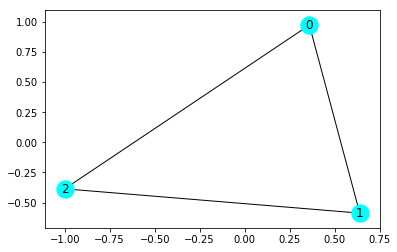

In [23]:
induced =community_louvain.induced_graph(part,item_proj)
# print(induced.nodes())
# print(induced.edges())
nx.draw_networkx(induced,node_color='cyan')
plt.show()

In [24]:
community={0:[],1:[],2:[]}
for key,value in part.items():
    community[value].append(key)

In [25]:
community[0]

['Ladybird Ladybird (1994)',
 'Grateful Dead (1995)',
 'Misérables, Les (1995)',
 'Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)',
 'Endless Summer 2, The (1994)',
 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)',
 "It's a Wonderful Life (1946)",
 'Brothers McMullen, The (1995)',
 'Living in Oblivion (1995)',
 'Love Is All There Is (1996)',
 'Quiet Man, The (1952)',
 'Picture Bride (1995)',
 'Dances with Wolves (1990)',
 'Blue Angel, The (Blaue Engel, Der) (1930)',
 "Schindler's List (1993)",
 'Rebel Without a Cause (1955)',
 '2001: A Space Odyssey (1968)',
 'Run of the Country, The (1995)',
 'Local Hero (1983)',
 'Farewell My Concubine (1993)',
 'Down by Law (1986)',
 'Psycho (1960)',
 'Indian in the Cupboard, The (1995)',
 'Roman Holiday (1953)',
 'Fresh (1994)',
 'Bridge on the River Kwai, The (1957)',
 'Bedknobs and Broomsticks (1971)',
 'Apartment, The (1960)',
 'Miracle on 34th Street (1994)',
 'Wings of the Dove, The (1997)',
 'Annie Hall (1977)',


In [26]:
community[1]

['Better Off Dead... (1985)',
 'Fargo (1996)',
 'Richie Rich (1994)',
 'Dear God (1996)',
 'Secret Adventures of Tom Thumb, The (1993)',
 'Amityville Horror, The (1979)',
 'Money Train (1995)',
 'Tom & Viv (1994)',
 'Fatal Instinct (1993)',
 "Stephen King's The Langoliers (1995)",
 'Backbeat (1993)',
 'Grand Day Out, A (1992)',
 'Nick of Time (1995)',
 "Mary Shelley's Frankenstein (1994)",
 'Return of the Jedi (1983)',
 'Dave (1993)',
 'Gold Diggers: The Secret of Bear Mountain (1995)',
 'Lion King, The (1994)',
 'Window to Paris (1994)',
 'Fried Green Tomatoes (1991)',
 'Chasers (1994)',
 'Andre (1994)',
 'Cops and Robbersons (1994)',
 'Losing Isaiah (1995)',
 'Speed (1994)',
 'Young Guns (1988)',
 'Junior (1994)',
 'Radioland Murders (1994)',
 'Star Wars (1977)',
 'From Dusk Till Dawn (1996)',
 'Rent-a-Kid (1995)',
 'Shawshank Redemption, The (1994)',
 'Heavyweights (1994)',
 'Sound of Music, The (1965)',
 'Jingle All the Way (1996)',
 'To Wong Foo, Thanks for Everything! Julie Newma

In [27]:
community[2]

['Soul Food (1997)',
 'Gabbeh (1996)',
 'Cosi (1996)',
 'Squeeze (1996)',
 'Flower of My Secret, The (Flor de mi secreto, La) (1995)',
 'Ransom (1996)',
 "Brother's Kiss, A (1997)",
 'Beautician and the Beast, The (1997)',
 'Afterglow (1997)',
 "Ed's Next Move (1996)",
 'Senseless (1998)',
 'Switchback (1997)',
 'Jack (1996)',
 'Boogie Nights (1997)',
 'For Richer or Poorer (1997)',
 'Shadow of Angels (Schatten der Engel) (1976)',
 'Larger Than Life (1996)',
 'That Thing You Do! (1996)',
 "Devil's Advocate, The (1997)",
 'To Gillian on Her 37th Birthday (1996)',
 'Free Willy 3: The Rescue (1997)',
 'White Squall (1996)',
 'Extreme Measures (1996)',
 "Star Maker, The (Uomo delle stelle, L') (1995)",
 'Hercules (1997)',
 'Mr. Wrong (1996)',
 'Man Who Knew Too Little, The (1997)',
 'Heat (1995)',
 'Mars Attacks! (1996)',
 'Touch (1997)',
 "Wooden Man's Bride, The (Wu Kui) (1994)",
 'Heidi Fleiss: Hollywood Madam (1995) ',
 'Cemetery Man (Dellamorte Dellamore) (1994)',
 'Amityville 3-D (19

#### CLUSTERING

In [28]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster


In [29]:
df_u_item.head()

,movie_id,movie_name,year,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
d = df_u_item[df_u_item['year'] != '']
d.head()

,movie_id,movie_name,year,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# d=df_u_item.drop(columns=["movie_name","year","movie_id"])
d=d.drop(columns=["movie_name","movie_id"])

for i in range(d.shape[0]+1):
    try:
        d["year"][i]=int(d["year"][i].split("-")[-1].strip(),10)
    except:
        continue
    
    
#     print(type(d["year"][i])
# kmeans = KMeans(n_clusters=3).fit(d)
# y_kmeans=kmeans.predict(d)
# c=kmeans.fit_predict(d)

In [42]:
d.head()

,year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs_d=pca.fit_transform(d)


[]

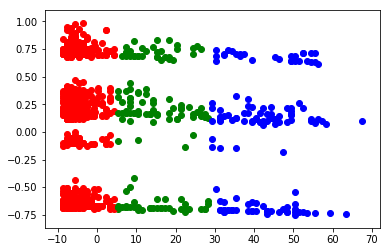

In [44]:
kmeans = KMeans(n_clusters=3).fit(d)
c=kmeans.fit_predict(d)
# print(set(c))
class1,class2,class3=list(),list(),list()
i=0
for x in c:
    if (x==0):
        plt.scatter(pcs_d[i][0],pcs_d[i][1],color='r')
        class1.append(df_u_item['movie_name'][i])
        i+=1
    elif (x==1):
        plt.scatter(pcs_d[i][0],pcs_d[i][1],color='b')
        class2.append(df_u_item['movie_name'][i])
        i+=1
    elif (x==2):
        plt.scatter(pcs_d[i][0],pcs_d[i][1],color='g')
        class3.append(df_u_item['movie_name'][i])
        i+=1

plt.plot()

# print(class1)
# print(class2)
# print(class3)

In [45]:
c1=set(class1)
c2=set(class2)
c3=set(class3)

co1=set(community[0])
co2=set(community[1])
co3=set(community[2])

c_list=[c1,c2,c3]
co_list=[co1,co2,co3]

mat=[]
for i in range(3):
    l=list()
    for j in range(3):
        l.append(len(co_list[i].intersection(c_list[j]))/len(co_list[i].union(c_list[j])))
    mat.append(l)


matrix = pd.DataFrame(mat, index=["community1", "community2", "community3"],columns=["c1","c2","c3"])
print(matrix)

                  c1        c2        c3
community1  0.164835  0.198238  0.135135
community2  0.320768  0.026074  0.078778
community3  0.376934  0.023392  0.020349


# Inference

#### The similarity between the cluster and community is calculated using Jaccard similarity</li>
#### From the cluster and community analysis it is found that the communities do not fall under different clusers but some time multiple communitites fall under a single cluster this might be because the community is calculated using neightborhood information but the clustering is done based on the attributed of the node in which case many nodes even thought far apart or not connected are similer to each other thus resulting in the same cluster
   
    
